## Fase 2: Visualización

In [37]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd

# Visualización
# ------------------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [33]:
# Lectura fichero 
df_cust= pd.read_csv("customer_limpio.csv")

In [34]:
df_cust.head()

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.00,Married,Aurora,7919.20,Standard,2016,8
1,100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,79371.73,Single,Nova,2887.74,Standard,2013,3
2,100140,2017,1,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,79371.73,Divorced,Nova,2838.07,Standard,2016,7
3,100214,2017,1,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.00,Married,Star,4170.57,Standard,2015,8
4,100272,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.00,Divorced,Star,6622.05,Standard,2014,1


### Preguntas

1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?


In [35]:
vuelo_book= df_cust.groupby('month')['flights_booked'].count().reset_index()
vuelo_book

,month,flights_booked
0,1,33625
1,2,33626
2,3,33634
3,4,33640
4,5,33640
5,6,33646
6,7,33648
7,8,33655
8,9,33659
9,10,33662


`Análisis:`
Se observa una relación fuerte positiva entre vuelos reservado y los últimos meses del año. Esto significa que a medida que aumentan los meses, acercándose a diciembre se espera un aumento en las reservas de vuelos

2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?

KeyboardInterrupt: 

findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: F

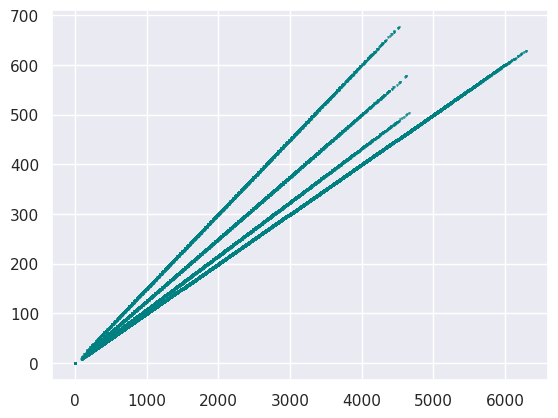

In [38]:
# Relación entre dos variables
sns.regplot(x = "distance", 
            y = "points_accumulated", 
            data = df_cust, 
            marker = "v", 
            line_kws = {"color": "black", "linewidth": 1}, # cambiamos el color y el grosor de la linea de tendencia
            scatter_kws = {"color": "teal", "s": 1} # cambiamos el color y el tamaño de los puntos del scaterplot
            )

# cambiamos los nombres de los ejes como hemos estado haciendo hasta ahora
plt.xlabel("Distancia", fontsize = 8)
plt.ylabel("Puntos acumulador", fontsize = 8)

# ponemos título a la gráfica
plt.title("Relación entre distancia", fontsize = 8);

2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por
los clientes?

3. ¿Cuál es la distribución de los clientes por provincia o estado?

4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de
los clientes?

5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

6. ¿Cómo se distribuyen los clientes según su estado civil y género?